In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from datetime import datetime

In [2]:
exec(open("../../header.py").read())

# Import data

In [3]:
X = pd.read_csv(processed_root('cervical_cancer_risks/X.csv'))
y = pd.read_csv(processed_root('cervical_cancer_risks/y.csv'))

# Fit model

In [4]:
# fit RF
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X, y['Biopsy'])

RandomForestClassifier(n_estimators=500)

# Age plot

In [5]:
exec(open("../../header.py").read())

In [6]:
ice = ICE("binary", trace = False)

In [7]:
ice.fit_single_feature(X, rf, "Age")

Fit Age in 3.23 seconds


Preprocessed data in 0.05 seconds
Plotted in 0.74 seconds


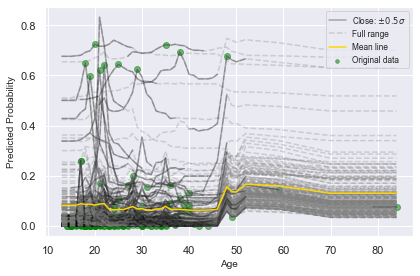

In [8]:
ice.ice_plot_single_feature('Age', plot_num = 200, mode = "ice", 
    save_path = results_root('cancer-dataset-production/age-ice.pdf'))

# Hepatitis-B ICE Plot

Preprocessed data in 0.04 seconds
Plotted in 0.32 seconds


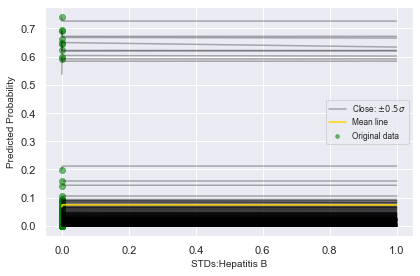

In [59]:
ice.ice_plot_single_feature('STDs:Hepatitis B', plot_num = 200, mode = "ice", 
    save_path = results_root('cancer-dataset-production/hepatitis-ice.pdf'))

# Fit all

In [9]:
ice.fit(X, rf)

Fit Age in 2.90 seconds
Fit Number of sexual partners in 1.86 seconds
Fit First sexual intercourse in 1.97 seconds
Fit Num of pregnancies in 1.71 seconds
Fit Smokes in 1.47 seconds
Fit Smokes (years) in 2.18 seconds
Fit Smokes (packs/year) in 3.05 seconds
Fit Hormonal Contraceptives in 1.49 seconds
Fit Hormonal Contraceptives (years) in 2.40 seconds
Fit IUD in 1.30 seconds
Fit IUD (years) in 2.05 seconds
Fit STDs in 1.47 seconds
Fit STDs (number) in 1.62 seconds
Fit STDs:condylomatosis in 1.45 seconds
Fit STDs:cervical condylomatosis in 1.50 seconds
Fit STDs:vaginal condylomatosis in 1.47 seconds
Fit STDs:vulvo-perineal condylomatosis in 1.41 seconds
Fit STDs:syphilis in 1.51 seconds
Fit STDs:pelvic inflammatory disease in 1.60 seconds
Fit STDs:genital herpes in 1.28 seconds
Fit STDs:molluscum contagiosum in 1.33 seconds
Fit STDs:AIDS in 1.18 seconds
Fit STDs:HIV in 1.35 seconds
Fit STDs:Hepatitis B in 1.40 seconds
Fit STDs:HPV in 1.58 seconds
Fit STDs: Number of diagnosis in 1.45 seco

# Full ICE plot

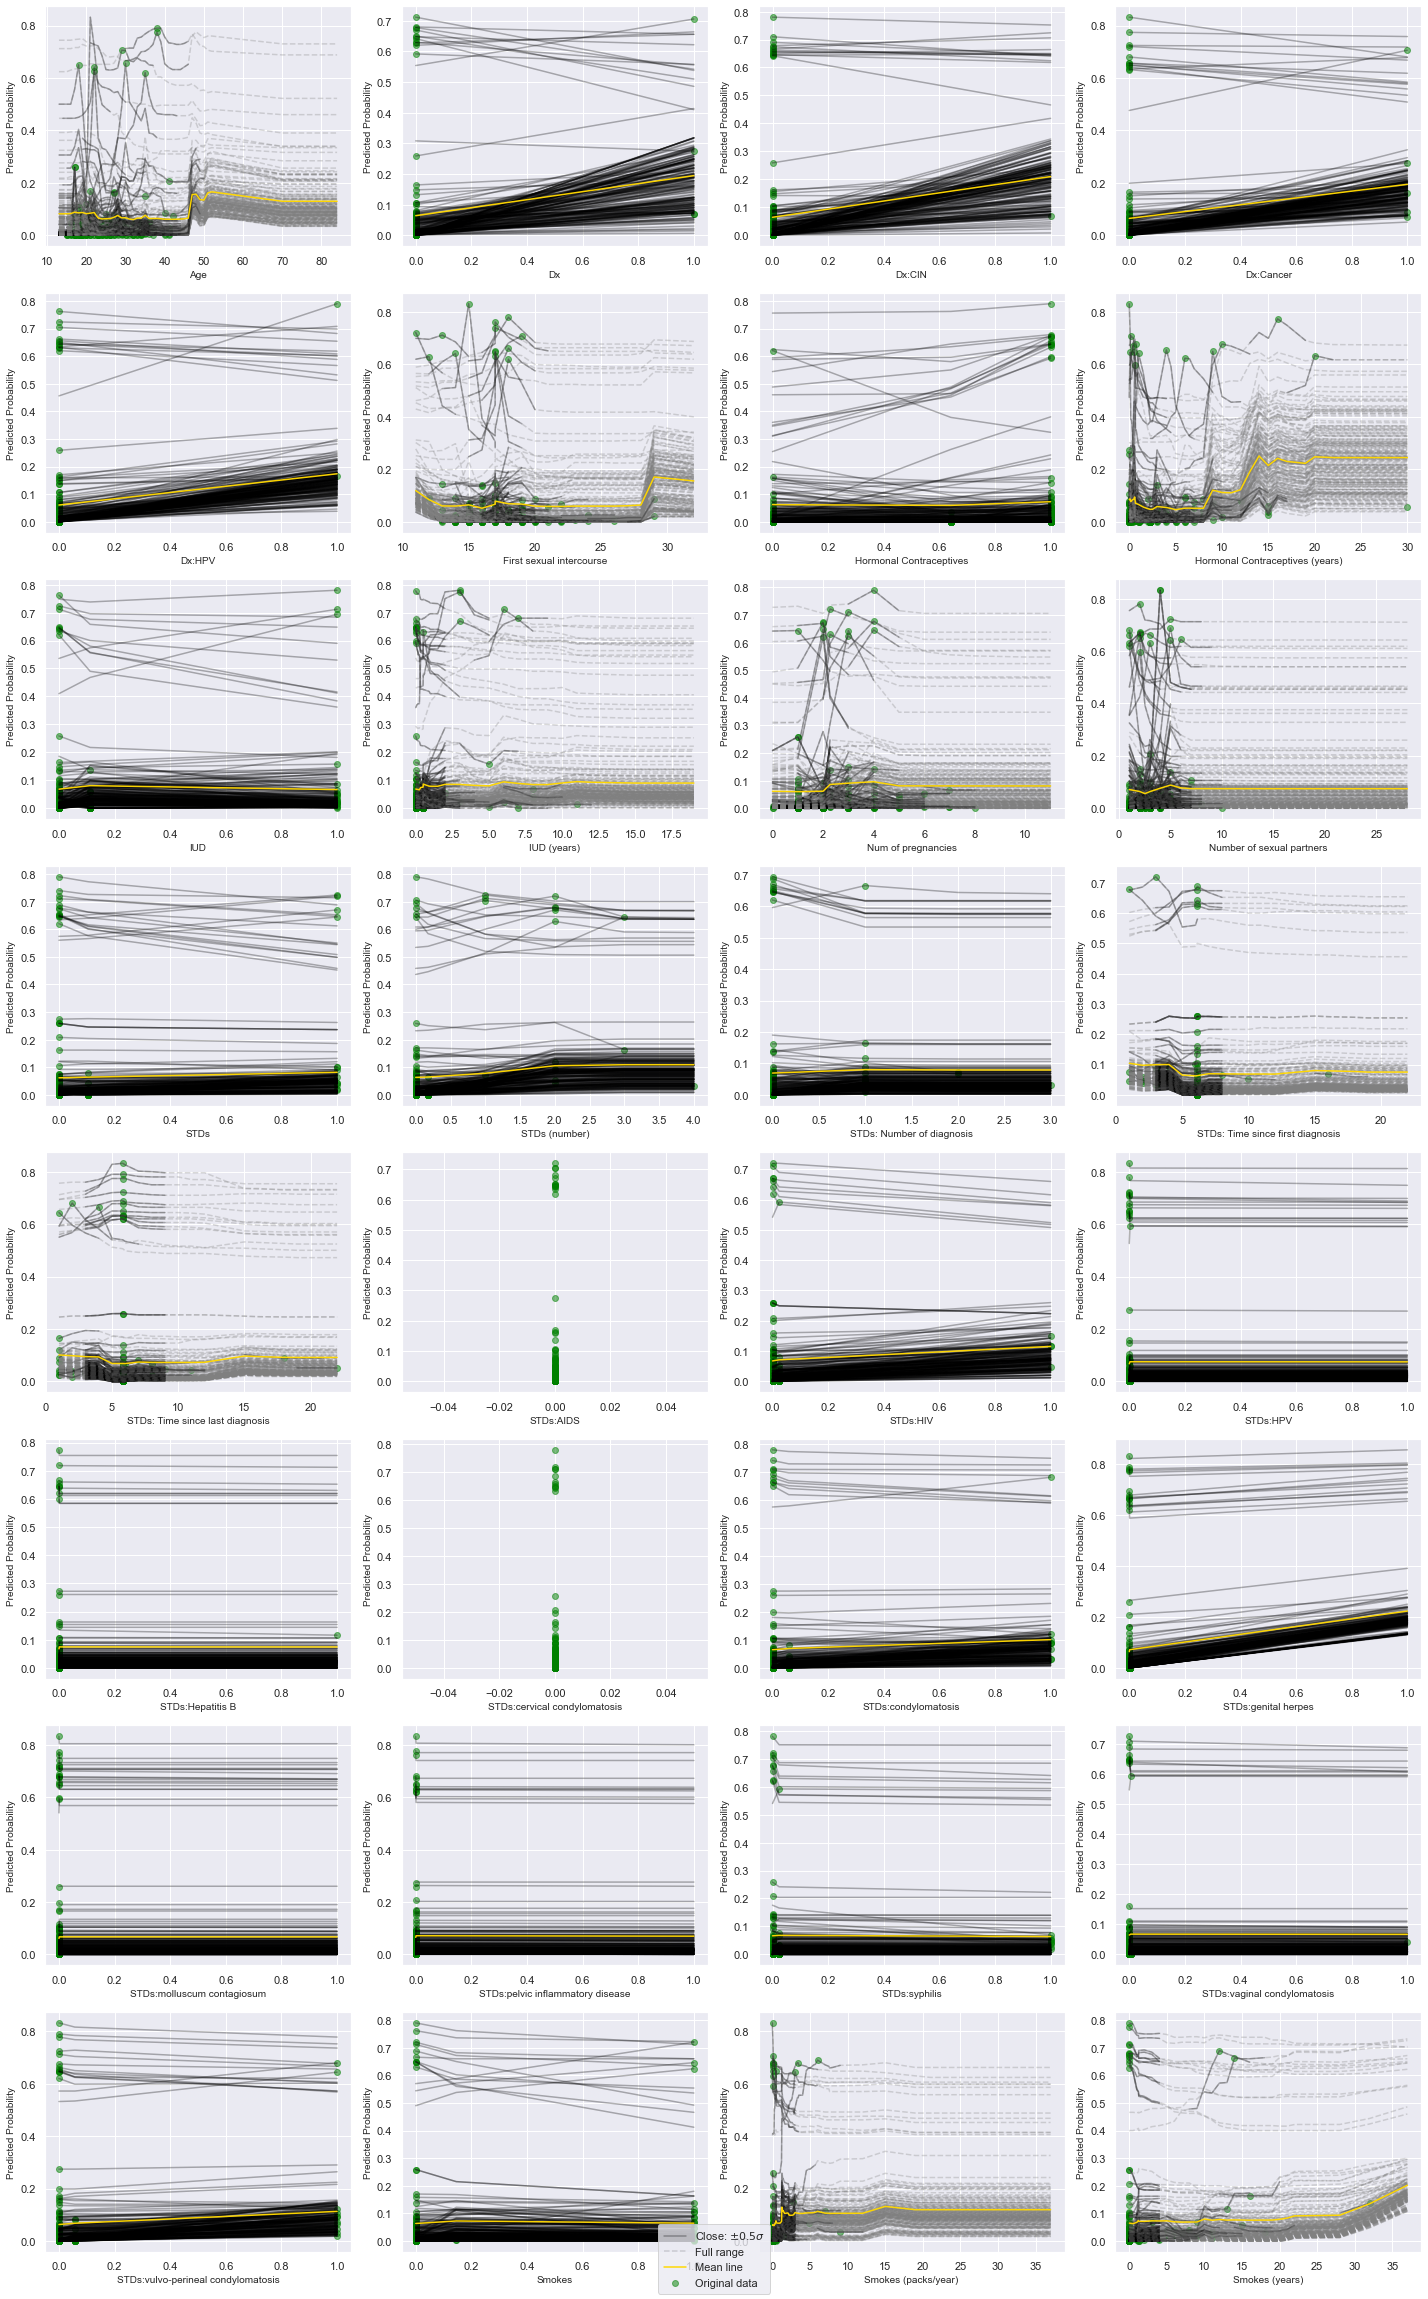

In [33]:
ice.ice_plot(save_path = results_root('cancer-dataset-production/all-ice-plots.pdf'),
             mode = 'ice', ncols = 4)
# ice.ice_plot(mode = "ice")

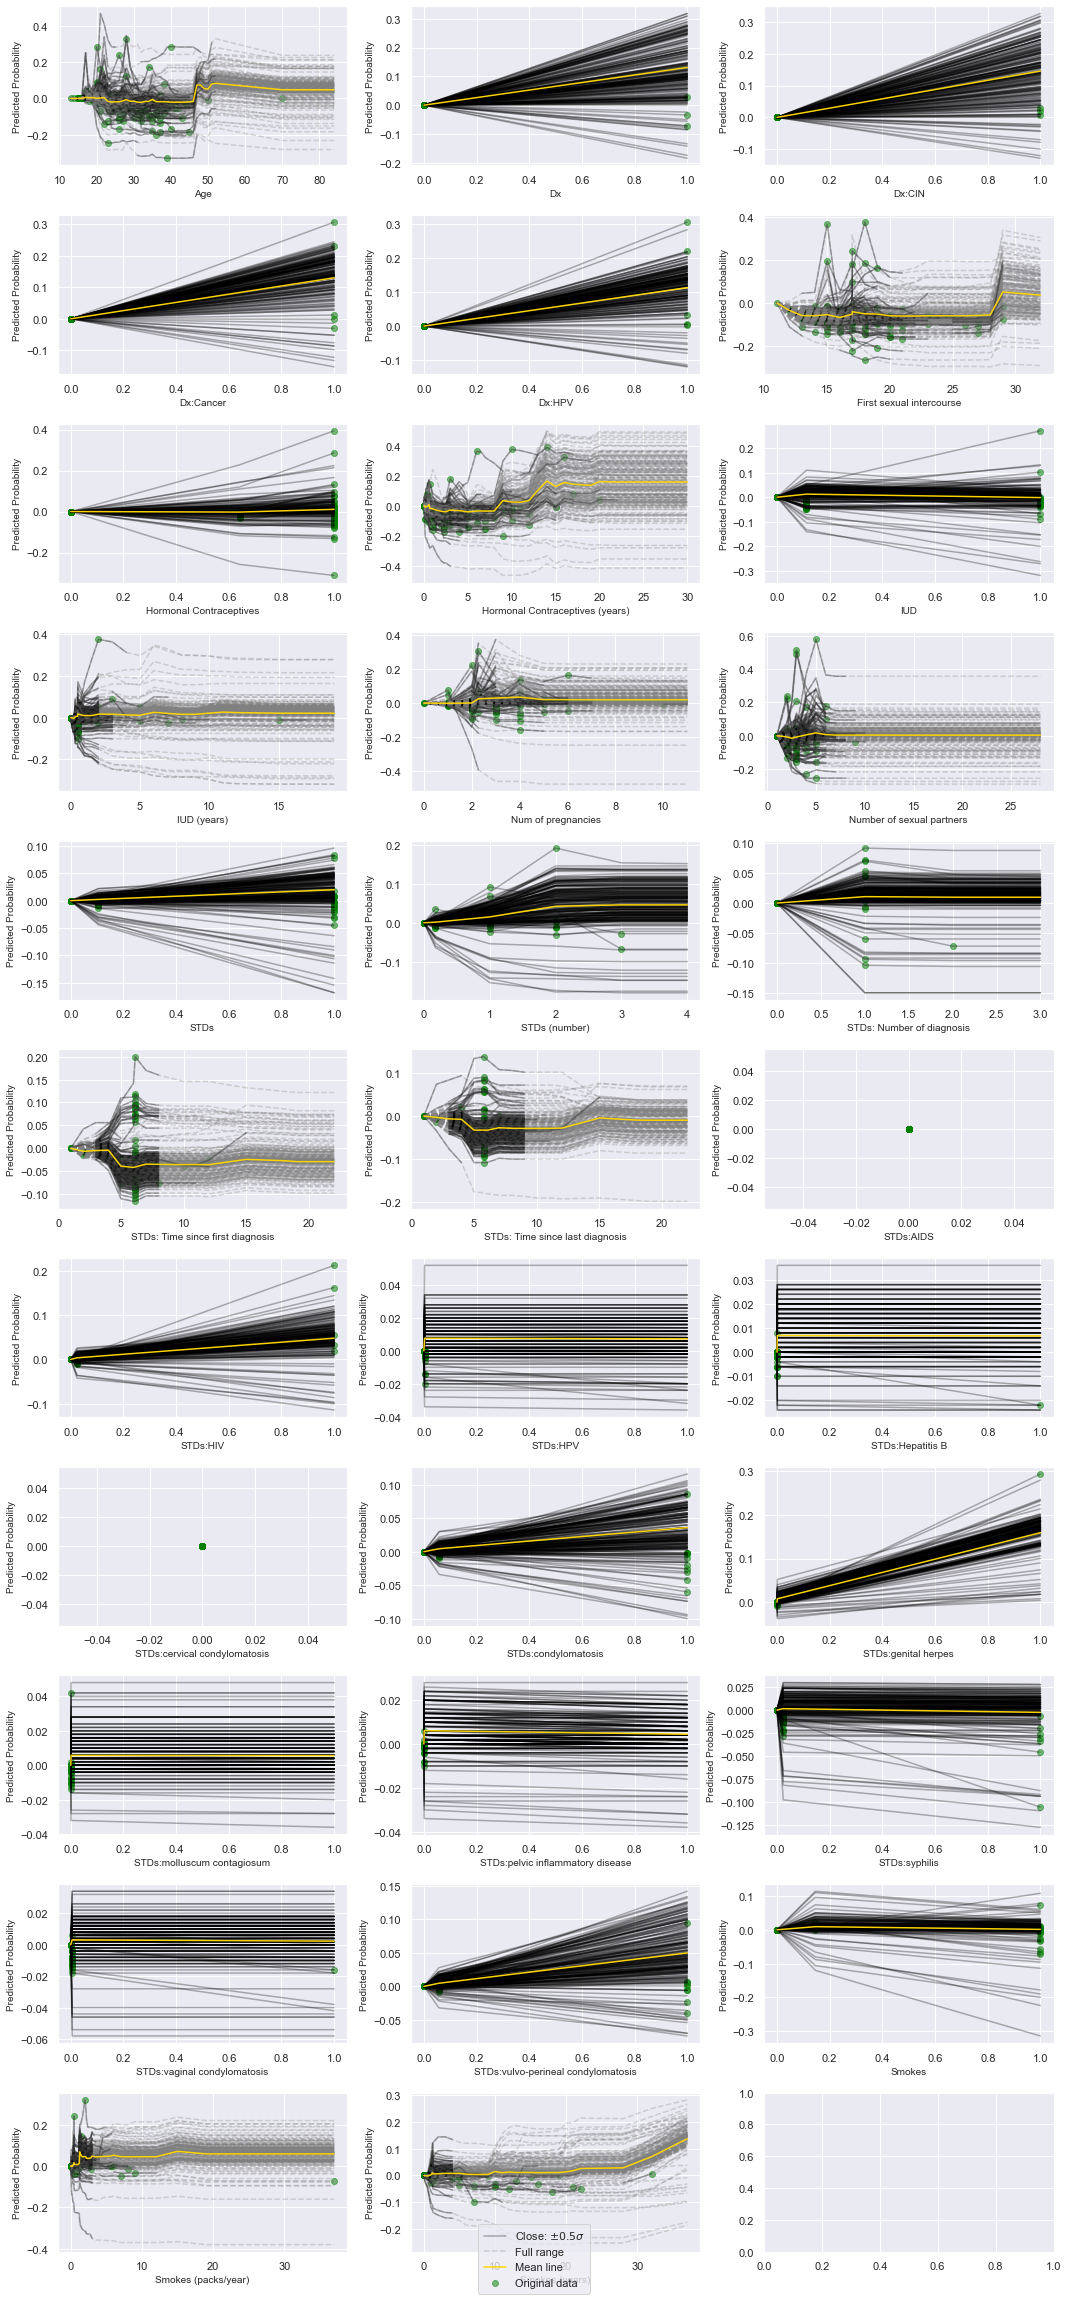

In [16]:
# ice.ice_plot(results_root("ice-plot-from-class/all_plots.pdf"))
ice.ice_plot(save_path = results_root('cancer-dataset-production/all-c-ice-plots.pdf'),
             mode = 'c-ice')

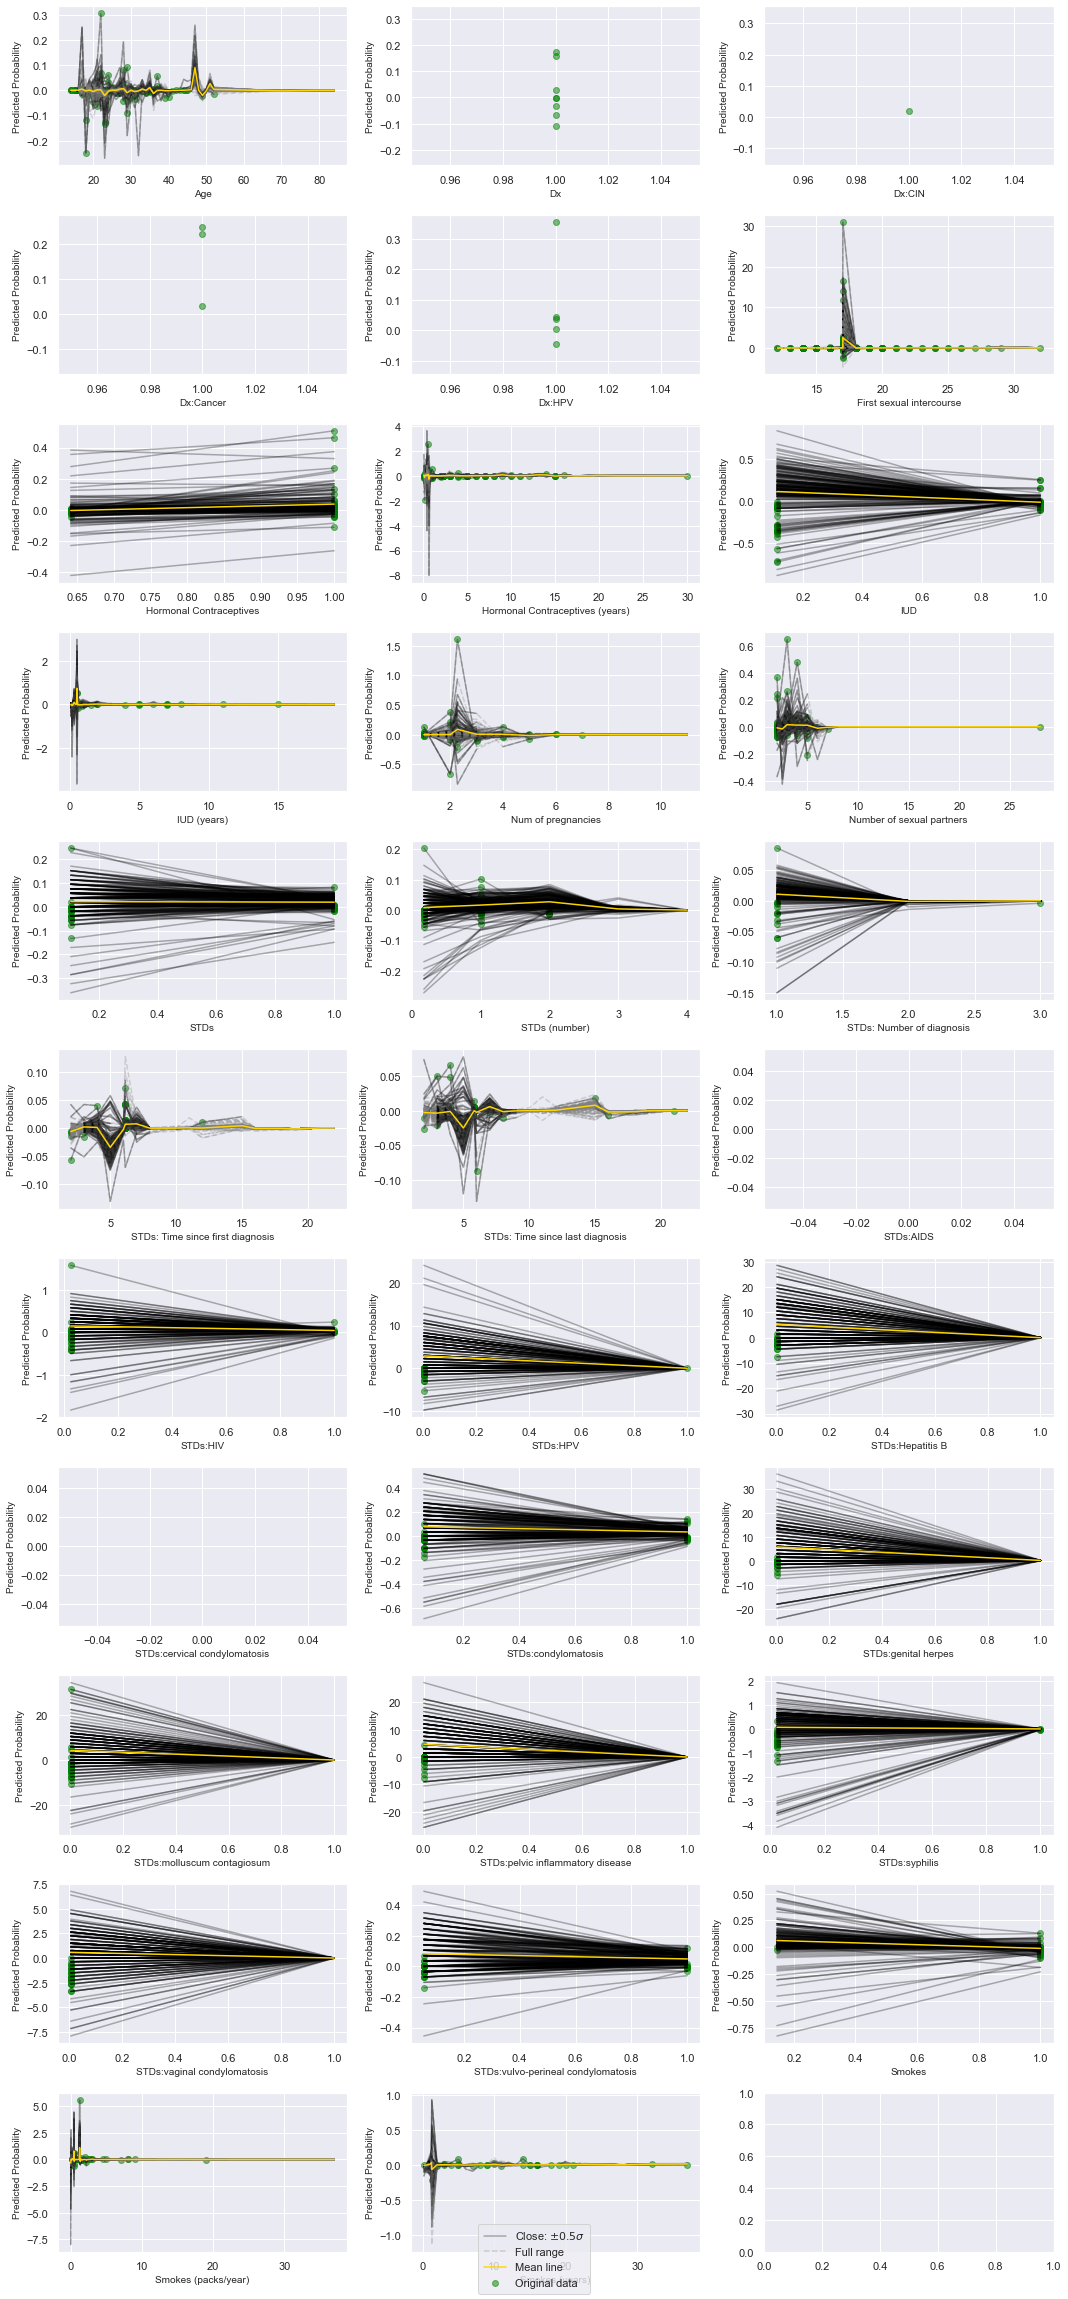

In [17]:
# ice.ice_plot(results_root("ice-plot-from-class/all_plots.pdf"))
ice.ice_plot(save_path = results_root('cancer-dataset-production/all-d-ice-plots.pdf'),
             mode = 'd-ice')

# Feature impact histogram

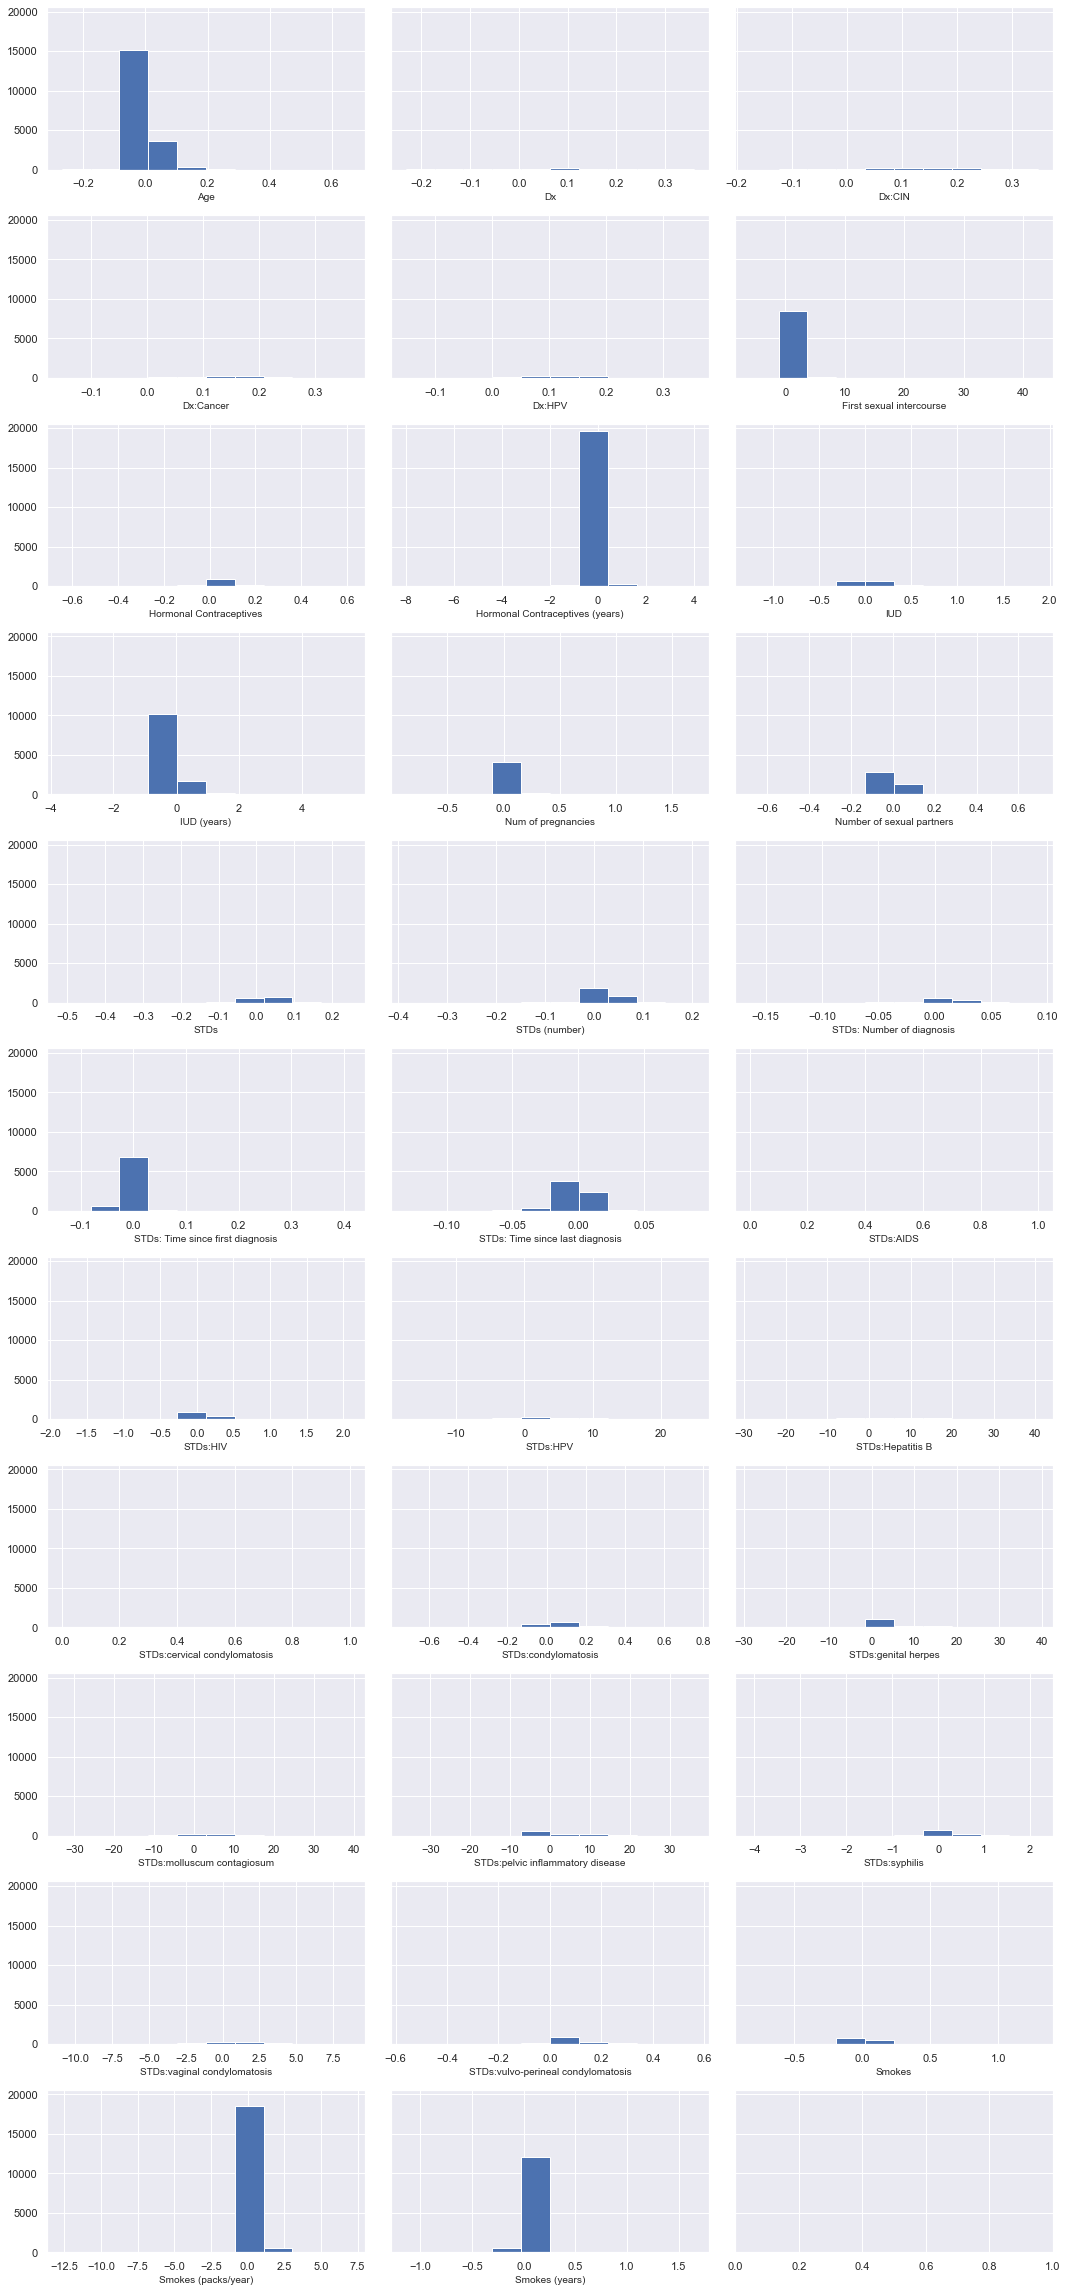

In [18]:
ice.feature_impact_hist(results_root("cancer-dataset-production/fi_histograms.pdf"))

# Feature impact vs random forest feature importance

In [43]:
b = pd.DataFrame({'Feature':X.columns, 
              'RF Feature Importance':rf.feature_importances_*100})\
    .round(3)

In [48]:
a = ice.feature_impact_table()\
    .merge(b, how = "inner", on = "Feature")\
    .assign(Difference = lambda x:x['Normalized Feature Impact'] - x['RF Feature Importance'],
            in_dist_difference = lambda x:x['Normalized In-Dist Feature Impact'] - x['RF Feature Importance'])\
    .rename({'in_dist_difference':'In-Dist Difference'}, axis = 1)\
    .round(2)\
    .sort_values('Difference', ascending = False)\
    .loc[:,['Feature', 'Feature Impact', 'In-Dist Feature Impact', 'Normalized Feature Impact', 'RF Feature Importance', 'Difference']]

In [61]:
a.sort_values('RF Feature Importance', ascending = False)

Feature  Feature Impact  \
0                                  Age            0.15   
8      Hormonal Contraceptives (years)            0.43   
2             First sexual intercourse            0.89   
3                   Num of pregnancies            0.08   
1            Number of sexual partners            0.09   
5                       Smokes (years)            0.10   
10                         IUD (years)            0.29   
6                  Smokes (packs/year)            0.45   
7              Hormonal Contraceptives            0.02   
9                                  IUD            0.06   
26    STDs: Time since first diagnosis            0.03   
27     STDs: Time since last diagnosis            0.03   
31                                  Dx            0.07   
28                           Dx:Cancer            0.07   
30                              Dx:HPV            0.06   
4                               Smokes            0.03   
29                              Dx:CIN            0.08   
22                            STDs:HIV            0.08   
12                       STDs (number)            0.03   
19                 STDs:genital herpes            1.85   
25           STDs: Number of diagnosis            0.01   
16  STDs:vulvo-perineal condylomatosis            0.04   
13                 STDs:condylomatosis            0.04   
11                                STDs            0.02   
17                       STDs:syphilis            0.12   
15         STDs:vaginal condylomatosis            0.44   
20          STDs:molluscum contagiosum            1.65   
24                            STDs:HPV            1.01   
23                    STDs:Hepatitis B            1.80   
18    STDs:pelvic inflammatory disease            1.60   
21                           STDs:AIDS            0.00   
14        STDs:cervical condylomatosis            0.00   

    In-Dist Feature Impact  Normalized Feature Impact  RF Feature Importance  \
0                     0.15                       1.26                  17.61   
8                     0.45                       3.67                  15.75   
2                     0.98                       7.69                  12.48   
3                     0.09                       0.66                  10.06   
1                     0.10                       0.80                   9.92   
5                     0.11                       0.88                   3.90   
10                    0.34                       2.52                   3.88   
6                     0.47                       3.85                   3.58   
7                     0.01                       0.14                   2.84   
9                     0.05                       0.53                   1.89   
26                    0.04                       0.30                   1.89   
27                    0.03                       0.23                   1.78   
31                    0.01                       0.61                   1.76   
28                    0.01                       0.59                   1.64   
30                    0.01                       0.52                   1.60   
4                     0.02                       0.24                   1.41   
29                    0.02                       0.65                   1.20   
22                    0.07                       0.72                   1.15   
12                    0.03                       0.24                   1.11   
19                    1.62                      15.98                   0.94   
25                    0.01                       0.08                   0.66   
16                    0.03                       0.35                   0.60   
13                    0.03                       0.34                   0.59   
11                    0.01                       0.17                   0.56   
17                    0.10                       1.03                   0.41   
15                    0.39          

In [52]:
print(a.to_latex(index = False,
                 column_format = 'p{5cm}c{1cm}c{1cm}c{1cm}c{1cm}c{1cm}',
                 label = "fig:cancer-fi-table",
                 caption = "Feature impact table for all features in cervical cancer dataset.",
                ))

\begin{table}
\centering
\caption{Feature impact table for all features in cervical cancer dataset.}
\label{fig:cancer-fi-table}
\begin{tabular}{p{5cm}c{1cm}c{1cm}c{1cm}c{1cm}c{1cm}}
\toprule
                            Feature &  Feature Impact &  In-Dist Feature Impact &  Normalized Feature Impact &  RF Feature Importance &  Difference \\
\midrule
                   STDs:Hepatitis B &            1.80 &                    1.60 &                      15.54 &                   0.13 &       15.41 \\
                STDs:genital herpes &            1.85 &                    1.62 &                      15.98 &                   0.94 &       15.04 \\
         STDs:molluscum contagiosum &            1.65 &                    1.46 &                      14.19 &                   0.17 &       14.03 \\
   STDs:pelvic inflammatory disease &            1.60 &                    1.42 &                      13.74 &                   0.12 &       13.62 \\
                           STDs:HPV &       

In [54]:
print(a\
      .assign(abs_diff = lambda x:np.abs(x['Difference']))\
      .sort_values('abs_diff', ascending = False)\
      .drop('abs_diff', axis = 1)\
      .head(5)\
      .to_latex(index = False,
                 column_format = 'p{5cm}c{1cm}c{1cm}c{1cm}c{1cm}c{1cm}',
                 label = "fig:cancer-fi-table-top-5",
                 caption = "Feature impact table for features in cervical cancer dataset with largest difference between feature importance and impact.",
                ))

\begin{table}
\centering
\caption{Feature impact table for features in cervical cancer dataset with largest difference between feature importance and impact.}
\label{fig:cancer-fi-table-top-5}
\begin{tabular}{p{5cm}c{1cm}c{1cm}c{1cm}c{1cm}c{1cm}}
\toprule
                          Feature &  Feature Impact &  In-Dist Feature Impact &  Normalized Feature Impact &  RF Feature Importance &  Difference \\
\midrule
                              Age &            0.15 &                    0.15 &                       1.26 &                  17.61 &      -16.35 \\
                 STDs:Hepatitis B &            1.80 &                    1.60 &                      15.54 &                   0.13 &       15.41 \\
              STDs:genital herpes &            1.85 &                    1.62 &                      15.98 &                   0.94 &       15.04 \\
       STDs:molluscum contagiosum &            1.65 &                    1.46 &                      14.19 &                   0.17 &      